## 偵測 & 去除離群值的方法
[Sourece：Ways to Detect and Remove the Outliers - from Towards Data Science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [19]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd 
from scipy import stats
import numpy as np

# visualize 
import seaborn as sns
import matplotlib.pyplot as plt

### 載入資料
* using Boston House Pricing Dataset

In [9]:
# 載入 boston 的 data
boston_dataset = load_boston()
x = boston_dataset.data
y = boston_dataset.target
columns = boston_dataset.feature_names

# 將 x、y 組成 df，column names 為 column
boston_df = pd.DataFrame(boston_dataset.data, columns=columns)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 偵測方法一：資料視覺化
* Box plot
* Scatter plot

#### Box plot

<AxesSubplot:xlabel='DIS'>

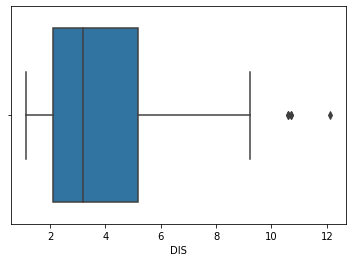

In [11]:
# detect 【DIS】
sns.boxplot(x=boston_df['DIS'])
# result：the data point between 10 and 12 are outliers

#### Scatter plot

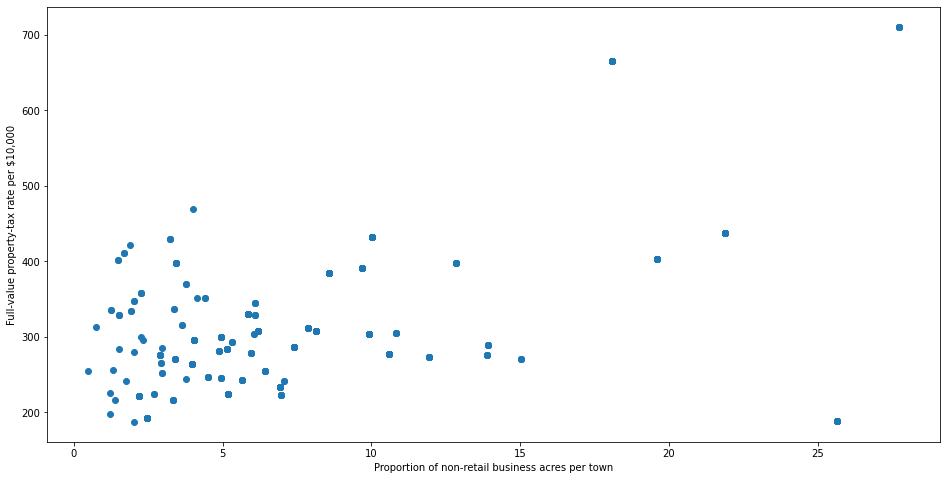

In [18]:
# detect 【INDUS】and 【TAX】
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel("Proportion of non-retail business acres per town")
ax.set_ylabel("Full-value property-tax rate per $10,000")
plt.show()

# result：most of data points are lying bottom left side

### 偵測方法二：Mathematical methods
* Z score
* IQR score

#### Z score

In [20]:
# count z score
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [23]:
# detect outliers
threshold = 3
print(np.where(z > threshold))
print("舉例：", z[55][1])

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

#### IQR score

In [24]:
# count IQR
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


### 去除離群值

#### Z score

In [29]:
boston_df_after_z_score = boston_df[(z<3).all(axis=1)]

In [37]:
print("Before removing outliers：", boston_df.shape)
print("After removing outliers：", boston_df_after_z_score.shape)

Before removing outliers： (506, 13)
After removing outliers： (415, 13)


#### IQR score

In [45]:
# 篩選值介於 Q1-1.5IQR ~ 03+1.5IQR
boston_df_after_IQR_score = boston_df[~((boston_df < (Q1-1.5*IQR)) | (boston_df > (Q3+1.5*IQR))).any(axis=1)]

In [46]:
print("Before removing outliers：", boston_df.shape)
print("After removing outliers：", boston_df_after_IQR_score.shape)

Before removing outliers： (506, 13)
After removing outliers： (274, 13)
